In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import warnings
import quandl
quandl.ApiConfig.api_key = 'sf6vPvynG4id8VymJUaH'
warnings.filterwarnings('ignore')

In [2]:
df = quandl.get("WIKI/FB", api_key='sf6vPvynG4id8VymJUaH')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


In [3]:
df  = df[['Adj. Close']]
print(df.head())
print(df.tail())

            Adj. Close
Date                  
2012-05-18     38.2318
2012-05-21     34.0300
2012-05-22     31.0000
2012-05-23     32.0000
2012-05-24     33.0300
            Adj. Close
Date                  
2018-03-21      169.39
2018-03-22      164.89
2018-03-23      159.39
2018-03-26      160.06
2018-03-27      152.19


In [4]:
forecast_days = 30

In [5]:
# Adding prediction column

df['Prediction'] = df[['Adj. Close']].shift(-forecast_days)
print(df.tail())

            Adj. Close  Prediction
Date                              
2018-03-21      169.39         NaN
2018-03-22      164.89         NaN
2018-03-23      159.39         NaN
2018-03-26      160.06         NaN
2018-03-27      152.19         NaN


In [6]:
#independent dataset

x = np.array(df.drop(['Prediction'], 1))
x = x[:-forecast_days]
print(x)  #list of list

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [171.5499]
 [175.98  ]
 [176.41  ]]


In [7]:
# dependent variable

y = np.array(df['Prediction'])
y = y[:-forecast_days]
print(y)   #list 

[ 30.771  31.2    31.47  ... 159.39  160.06  152.19 ]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2)

In [9]:
# svr model 
svr_regressor = SVR(kernel = 'rbf', C=1e3)
svr_regressor.fit(x_test, y_test)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
svr_score = svr_regressor.score(x_test, y_test)
print("SVR score:" , svr_score)

SVR score: 0.9942019799290688


In [11]:
# linear regression 
lr_regressor = LinearRegression()
lr_regressor.fit(x_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
lr_score = lr_regressor.score(x_test, y_test)
print("Linear Regression score: ", lr_score)

Linear Regression score:  0.9778713980652767


In [13]:
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_days:]
print(x_forecast)

[[173.15]
 [179.52]
 [179.96]
 [177.36]
 [176.01]
 [177.91]
 [178.99]
 [183.29]
 [184.93]
 [181.46]
 [178.32]
 [175.94]
 [176.62]
 [180.4 ]
 [179.78]
 [183.71]
 [182.34]
 [185.23]
 [184.76]
 [181.88]
 [184.19]
 [183.86]
 [185.09]
 [172.56]
 [168.15]
 [169.39]
 [164.89]
 [159.39]
 [160.06]
 [152.19]]


In [14]:
svr_prediction = svr_regressor.predict(x_forecast)
print(svr_prediction)

[175.89331551 181.6893566  176.28663    166.52159926 158.98325102
 176.30826689 188.19901388 168.46993712 110.01272231 120.93859486
 186.00344154 161.78252646 149.52332527 154.71578368 179.81082621
 138.9980899  172.92129877 117.47522547 108.34449926 141.23123646
 115.3206881  129.79014859 113.22619006 176.25259105 175.87549419
 165.68023474 170.65369972 163.60071354 129.54237865 154.13529164]


In [15]:
lr_prediction = lr_regressor.predict(x_forecast)
print(lr_prediction)

[177.91538235 184.41421484 184.86311379 182.2105291  180.83322551
 182.77165278 183.87349565 188.26046264 189.93363145 186.39345111
 183.18994498 180.76180977 181.45556268 185.31201274 184.67947331
 188.68895709 187.29124901 190.23969891 189.76019322 186.82194556
 189.17866504 188.84199082 190.09686743 177.31344967 172.81425794
 174.07933679 169.48832483 163.87708798 164.56063865 156.53146884]


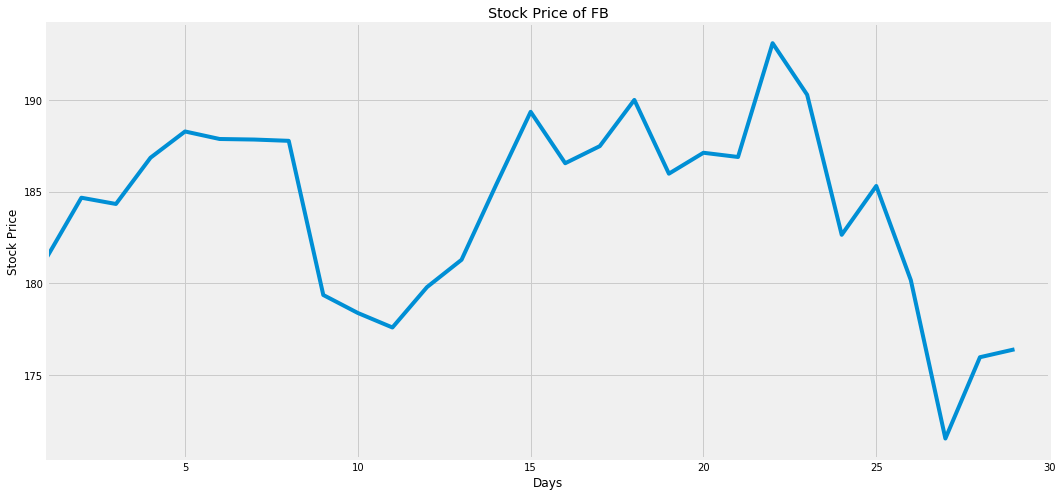

In [26]:
plt.figure(figsize=(16,8))
plt.title('Stock Price of FB')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.plot(x[-forecast_days:])
plt.xlim(1,30)
plt.show()

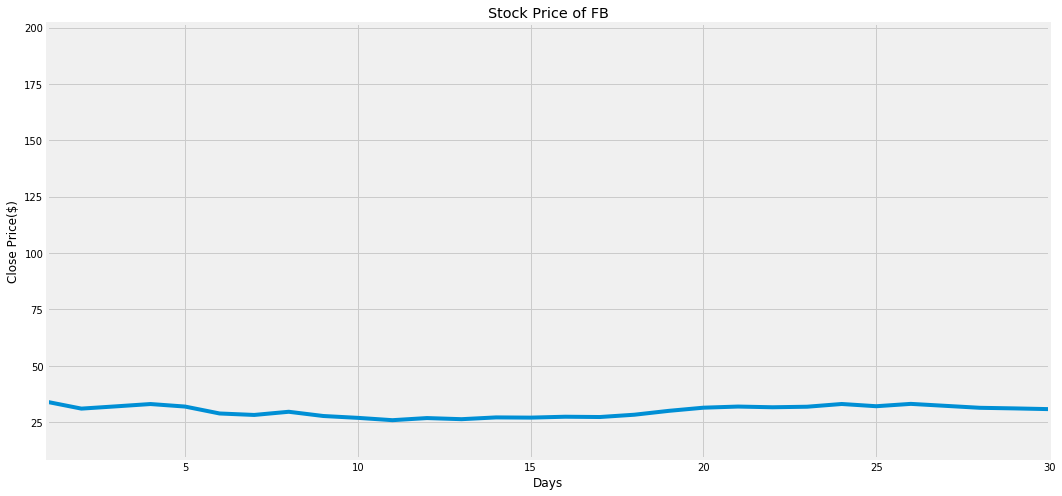

In [30]:
plt.figure(figsize=(16,8))
plt.title('Stock Price of FB')
plt.xlabel('Days')
plt.ylabel('Close Price($)')
plt.plot(x)
plt.xlim(1,30)
plt.show()